<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/face-recognization/imagemerge_ipynb_idxplus_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


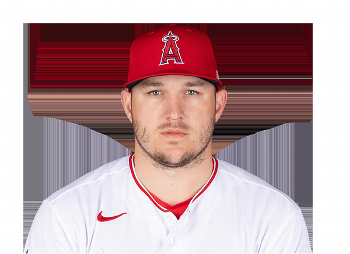

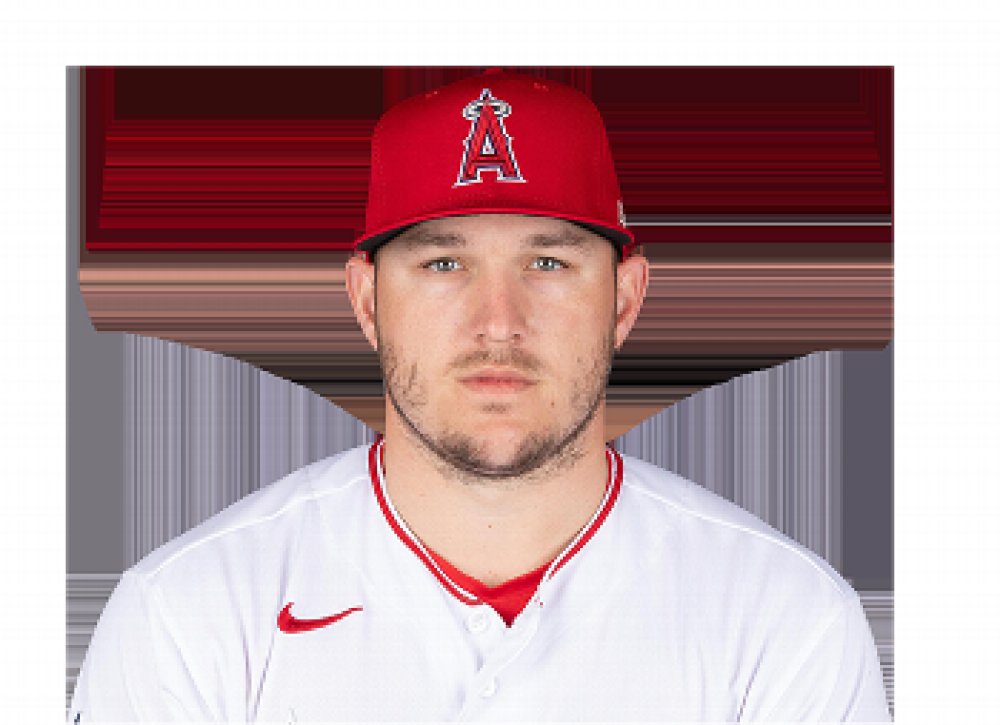

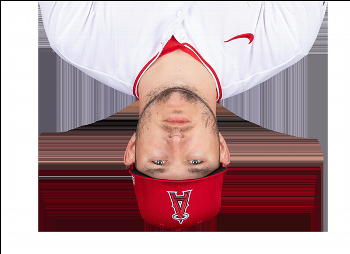

In [ ]:
import cv2
import imutils #복잡하고 사용성이 떨어지는 것을 보완해주는 라이브러리
from google.colab.patches import cv2_imshow


image = cv2.imread('/gdrive/MyDrive/trout.jpg',cv2.IMREAD_COLOR)
new_image = imutils.resize(image,width=1000)
rotate_image = imutils.rotate(image,angle=180)
cv2_imshow(image)
cv2_imshow(new_image)
cv2_imshow(rotate_image)

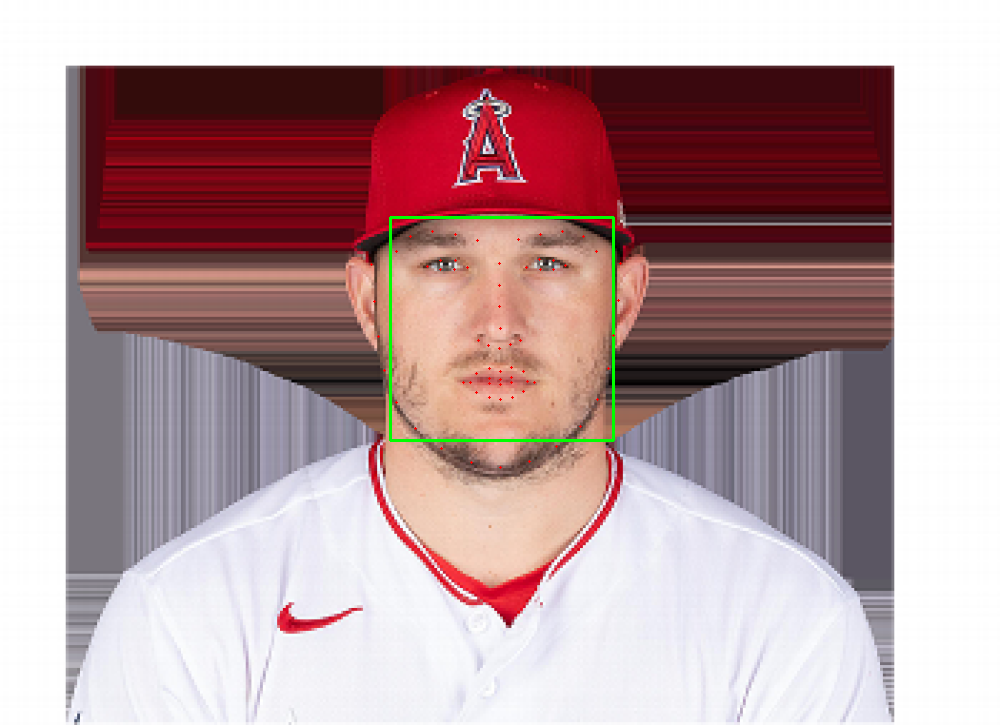

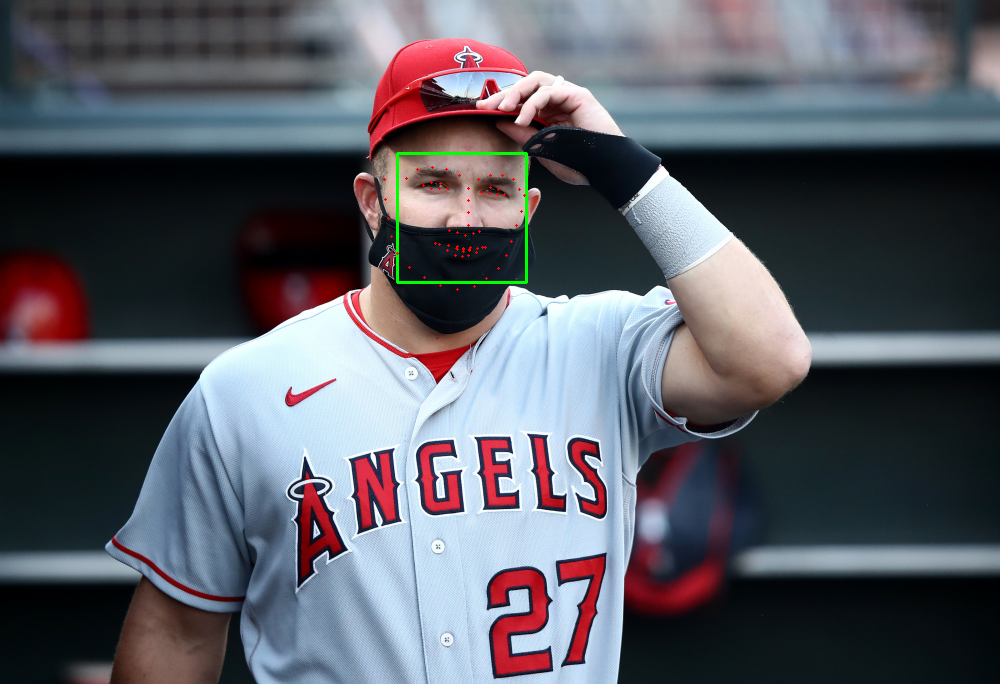

{0: [371, 264], 1: [374, 301], 2: [378, 336], 3: [384, 370], 4: [396, 402], 5: [415, 428], 6: [441, 448], 7: [471, 462], 8: [500, 467], 9: [529, 461], 10: [556, 446], 11: [580, 426], 12: [597, 399], 13: [608, 368], 14: [613, 335], 15: [618, 300], 16: [620, 263], 17: [396, 251], 18: [410, 236], 19: [432, 231], 20: [455, 234], 21: [477, 240], 22: [518, 239], 23: [540, 234], 24: [562, 231], 25: [583, 236], 26: [596, 251], 27: [499, 263], 28: [499, 285], 29: [499, 306], 30: [500, 328], 31: [478, 340], 32: [488, 345], 33: [499, 348], 34: [510, 344], 35: [520, 340], 36: [427, 266], 37: [440, 260], 38: [455, 260], 39: [467, 267], 40: [454, 269], 41: [440, 269], 42: [526, 267], 43: [539, 259], 44: [553, 260], 45: [565, 265], 46: [553, 269], 47: [540, 269], 48: [463, 382], 49: [476, 373], 50: [489, 368], 51: [500, 371], 52: [511, 367], 53: [523, 371], 54: [534, 382], 55: [523, 391], 56: [512, 397], 57: [500, 399], 58: [489, 397], 59: [476, 392], 60: [470, 382], 61: [489, 378], 62: [500, 379], 6

In [ ]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2

ALL = list(range(0, 68))
RIGHT_EYEBROW = list(range(17, 22))
LEFT_EYEBROW = list(range(22, 27))
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
NOSE = list(range(27, 36))
MOUTH_OUTLINE = list(range(48, 61))
MOUTH_INNER = list(range(61, 68))
JAWLINE = list(range(0, 17))

landmark_list1 = []
landmark_list2 = []

def show_raw_detection(image, detector, predictor, landmark_list):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # detect faces in the grayscale image
  rects = detector(gray, 1)

  # loop over the face detections
  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then 
    # convert the facial landmark (x, y)-coordinates to a NumPy 
    # array 
    shape = predictor(gray, rect) 
    shape = face_utils.shape_to_np(shape)
  
    # convert dlib's rectangle to a OpenCV-style bounding box 
    # [i.e., (x, y, w, h)], then draw the face bounding box 
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) 
  
    # show the face number
    #cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
      landmark_list.append([x, y])
      cv2.circle(image, (x, y), 1, (0, 0, 255), -1) 
    
  # show the output image with the face detections + facial landmarks
  cv2_imshow(image)
  cv2.waitKey(0)
  
    
# initialize dlib's face detector (HOG-based) and then create 
# the facial landmark predictor 
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/MyDrive/shape_predictor_68_face_landmarks.dat')

# load the input image, resize it, and convert it to grayscale
image = cv2.imread('/gdrive/MyDrive/trout.jpg')
image = imutils.resize(image, width=1000)
show_raw_detection(image, detector, predictor, landmark_list1)

image = cv2.imread('/gdrive/MyDrive/troutmask.jpg')
image = imutils.resize(image, width=1000)
show_raw_detection(image, detector, predictor, landmark_list2)

key_val = [ALL, landmark_list1]
landmark_dict = dict(zip(*key_val))
print(landmark_dict)
key_val = [ALL, landmark_list2]
landmark_dict = dict(zip(*key_val))
print(landmark_dict)
